## **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [52]:
flights = pd.read_csv("/Users/vickichen/Desktop/flight/midterm-project/data/flights_without_outlier.csv")

In [53]:
list(flights.columns)

['fl_date',
 'mkt_unique_carrier',
 'op_unique_carrier',
 'op_carrier_fl_num',
 'origin',
 'origin_city_name',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

In [54]:
df_select = flights[['dep_time','taxi_out','arr_time','taxi_in']]
df_select                     

,dep_time,taxi_out,arr_time,taxi_in
0,1303,17.0,1509,8.0
1,1833,30.0,2155,10.0
2,1353,16.0,1503,3.0
3,1533,13.0,1620,13.0
4,713,23.0,908,9.0
...,...,...,...,...
168920,1152,18.0,1503,7.0
168921,1730,17.0,1840,9.0
168922,1726,13.0,2025,15.0
168923,836,36.0,1039,7.0


In [55]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168925 entries, 0 to 168924
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   dep_time  168925 non-null  int64  
 1   taxi_out  168925 non-null  float64
 2   arr_time  168925 non-null  int64  
 3   taxi_in   168925 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 5.2 MB


In [56]:
#To convert taxi_out, tax_in to inter.

flights[['taxi_out','taxi_in']] = flights[['taxi_out','taxi_in']].astype(int)
flights.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168925 entries, 0 to 168924
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              168925 non-null  object 
 1   mkt_unique_carrier   168925 non-null  object 
 2   op_unique_carrier    168925 non-null  object 
 3   op_carrier_fl_num    168925 non-null  int64  
 4   origin               168925 non-null  object 
 5   origin_city_name     168925 non-null  object 
 6   dest                 168925 non-null  object 
 7   dest_city_name       168925 non-null  object 
 8   crs_dep_time         168925 non-null  int64  
 9   dep_time             168925 non-null  int64  
 10  dep_delay            168925 non-null  float64
 11  taxi_out             168925 non-null  int64  
 12  taxi_in              168925 non-null  int64  
 13  crs_arr_time         168925 non-null  int64  
 14  arr_time             168925 non-null  int64  
 15  arr_delay        

In [57]:
#to convert integer time to standard time in string, mentor's codes 
def time_row(row):
    row_int = int(row)
    row_str = str(row_int)
    len_row = len(row_str)
    if len_row == 1:
        minute = row_str
        hour = '00'
        row = hour + ':' + minute
    if len_row == 2:
        minute =  row_str[0] + row_str[1]
        hour = '00'
        row = hour + ':' + minute
    if len_row == 3:
        minute = row_str[1]+row_str[2]
        hour = row_str[0]
        row = hour + ':' + minute
    elif len_row == 4:
        minute = row_str[2] + row_str[3]
        hour = row_str[0] + row_str[1]
        row = hour + ':' + minute
        if row == '24:00':
            row = '23:59'
    return str(row)

### Taxi in VS Arrival Flights  

In [ ]:
#Apply date and time  to  arr_time and taxi_in
flights['arr_time_convert'] = flights['arr_time'].apply(time_row)

flights['arr_time_convert'] = pd.to_datetime(\
                                            flights['arr_time_convert'],\
                                            format='%H:%M').dt.time

taxi_in_mean= flights.groupby(by=[flights\
                                    .arr_time_convert.map(\
                                    lambda x : (x.hour))])['taxi_in'].mean()
num_arrival = flights.groupby(by=[flights\
                                            .arr_time_convert.map(lambda x : (x.hour))])['taxi_in'].count()



Text(0, 0.5, 'Average Time(min)')

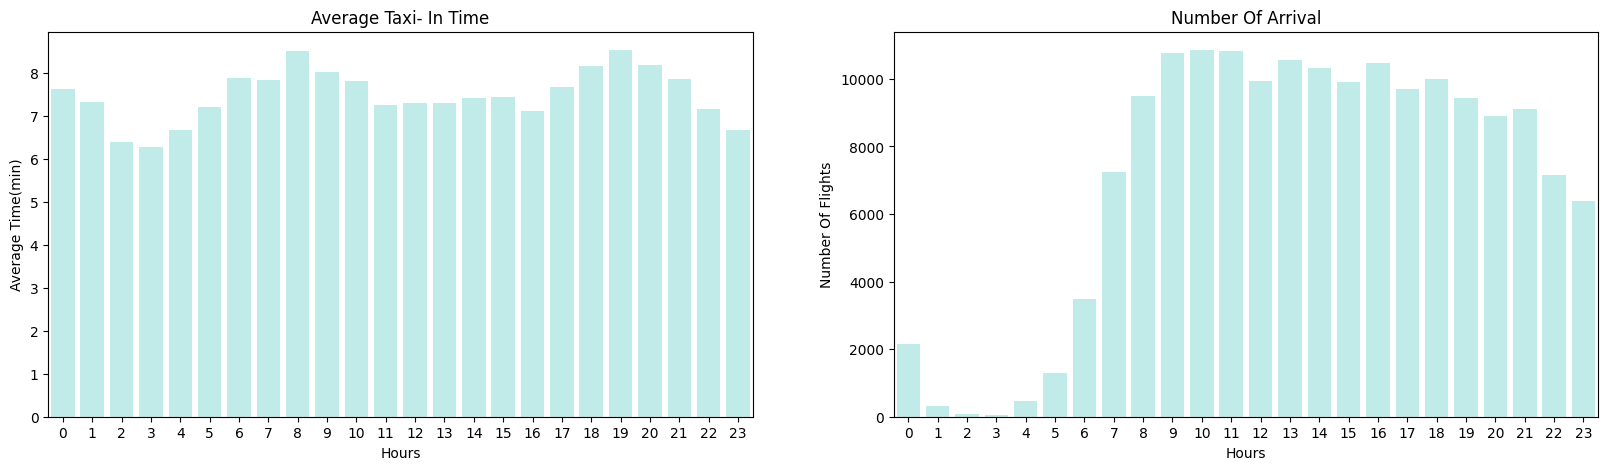

In [82]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.set_color_codes("pastel")



#number of flights
sns.barplot(ax=axes[1], x=num_arrival.index, y=num_arrival.values,color='c')
axes[1].set_title('Number Of Arrival')
axes[1].set_xlabel('Hours')
axes[1].set_ylabel('Number Of Flights')


#average departures (TAXI - OUT)
sns.barplot(ax=axes[0], x=taxi_in_mean.index, y=taxi_in_mean.values,color='c')
axes[0].set_title('Average Taxi- In Time')
axes[0].set_xlabel('Hours')
axes[0].set_ylabel('Average Time(min)')

### Taxi Out VS. Departure Flights 

In [ ]:
#Apply date and time  to  dep_time and taxi_out
flights['dep_time_convert'] = flights['dep_time'].apply(time_row)

flights['dep_time_convert'] = pd.to_datetime(\
                                            flights['dep_time_convert'],\
                                            format='%H:%M').dt.time

taxi_out_mean= flights.groupby(by=[flights\
                                    .dep_time_convert.map(\
                                    lambda x : (x.hour))])['taxi_out'].mean()
num_departures = flights.groupby(by=[flights\
                                            .dep_time_convert.map(lambda x : (x.hour))])['taxi_out'].count()


<function matplotlib.pyplot.show(close=None, block=None)>

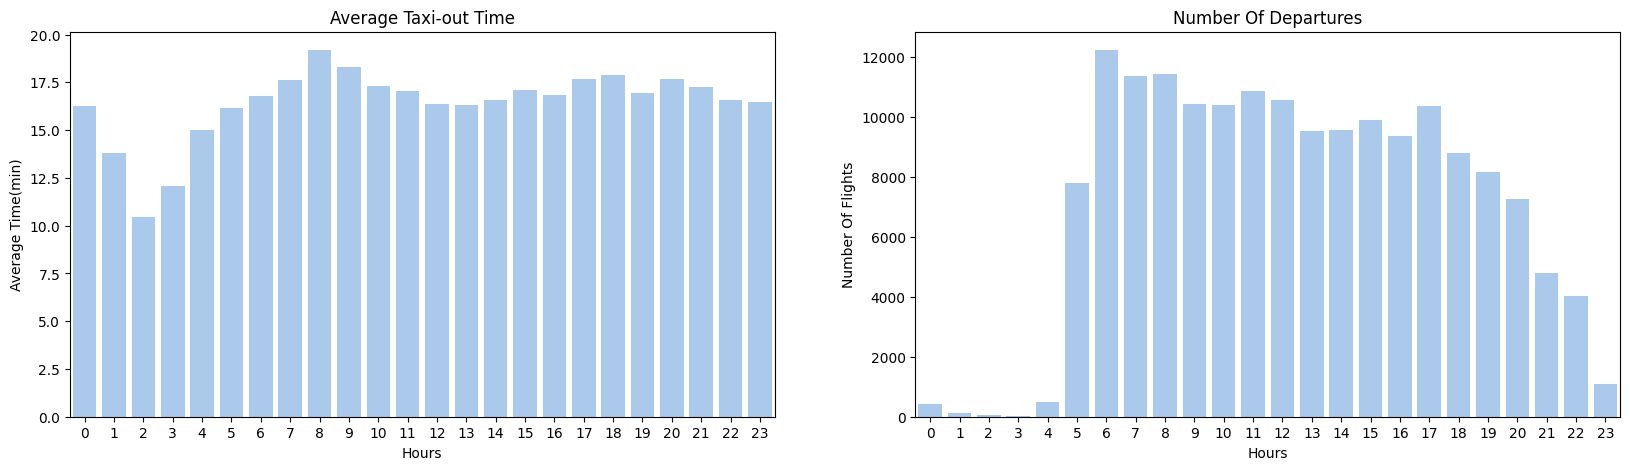

In [79]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.set_color_codes("pastel")



#number of flights
sns.barplot(ax=axes[1], x=num_departures.index, y=num_departures.values,color='b')
axes[1].set_title('Number Of Departures')
axes[1].set_xlabel('Hours')
axes[1].set_ylabel('Number Of Flights')


#average departures (TAXI - OUT)
sns.barplot(ax=axes[0], x=taxi_out_mean.index, y=taxi_out_mean.values,color='b')
axes[0].set_title('Average Taxi-out Time')
axes[0].set_xlabel('Hours')
axes[0].set_ylabel('Average Time(min)')

plt.show

## Conclusion : Higher traffic DOES NOT  lead to bigger taxi times